In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import csv
import time
from sklearn import tree

In [46]:
#read in data
use = [1,1,1,1]
all_data = []
all_data2 = []



#read in blob dataset

X_training = []
y_training = []
header = []
c = 0

with open("DataSets/Wind Power Generation Data - Forecasting/Location1.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if( c == 0):
            header = row[1:-1]
            c+=1
            continue
        X_training.append([float(x) for x in row[1:-1]])
        y_training.append(float(row[-1]))
        #print(row)

X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data

train = [(x,y) for x,y in zip (X_train,y_train)]
test = [(x,y) for x,y in zip (X_test,y_test)]

all_data2.append([train,test])

all_data.append([X_train, X_test, y_train, y_test,header])


X_training = []
y_training = []
header = []
c = 0
with open("DataSets/auto+mpg/auto-mpg.data","r") as file:
    r = csv.reader(file)
    header  = ['cylinders','displacement','horsepower','weight','acceleration','model year','origin']
    for row in r:   
        line = row[0].split(' ')
        #print(line)      
        if( '?' in line):

            continue

        buff = [float(x) for x in row[0][1:].split(' ') if x!='' and x.replace('.', '', 1).isdigit() ]
        X_training.append([float(x) for x in row[0][1:].split(' ') if x!='' and x.replace('.', '', 1).isdigit() ][0:7])
        y_training.append(float(row[0][0]))

X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data

train = [(x,y) for x,y in zip (X_train,y_train)]
test = [(x,y) for x,y in zip (X_test,y_test)]

all_data2.append([train,test])

all_data.append([X_train, X_test, y_train, y_test,header])

X_training = []
y_training = []
header = []
c = 0

with open("DataSets/Graduate Admission 2/Admission_Predict_Ver1.1.csv","r") as file:
    r = csv.reader(file)
    
    for row in r:
        if(c == 0):
            header = row[1:-1]
            c+=1
            continue
        X_training.append([float(x) for x in row[1:-1]])
        y_training.append(float(row[-1]))


X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data

train = [(x,y) for x,y in zip (X_train,y_train)]
test = [(x,y) for x,y in zip (X_test,y_test)]

all_data2.append([train,test])


all_data.append([X_train, X_test, y_train, y_test,header])


#read in house price dataset
X_training = []
y_training = []
header = []
c = 0
with open("DataSets/house_att.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        if(c == 0):
            header = row
            c+=1
            continue
        X_training.append([float(x) for x in row])
        
with open("DataSets/house_price.csv","r") as file:
    r = csv.reader(file)
    for row in r:
        y_training.append(float(row[0]))




        
print(len(X_training))
print(len(y_training))
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data

train = [(x,y) for x,y in zip (X_train,y_train)]
test = [(x,y) for x,y in zip (X_test,y_test)]

all_data2.append([train,test])

all_data.append([X_train, X_test, y_train, y_test,header])
print(len(all_data2))

10000
10000
4


In [47]:
forest = []
times = []
#limits = [0.5,0.75,1,1.25,1.5,1.75,2]
#divide = [1]

from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 


limits = [80,75,70,65,60,55,50,45,40,35,30,25,20,15,10]

#for each dataset we build a tree and mesure the elapsed time
for i in all_data:
    f = []
    t = []
    for l in limits:
        
        print("-------------------------------------------------------")
    
        start = time.time()
        # create a regressor object
        regressor = DecisionTreeRegressor(random_state = 0,min_samples_leaf=l) 
        # fit the regressor with X and Y data
        
        regressor.fit(i[0], i[2])
    
        end = time.time()
        f.append(regressor)
        t.append(end-start)
        
        
    forest.append(f)
    times.append(t)

-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------


In [48]:
predicted_value = []#predicted points
difference = []
MSE = []
sum_y = []

all_mse = []

#for each tree we calculate the mean squared error
#all_data = [X_train,X_test,y_train,y_test,header]
for v in range(len(forest)):
    MSE = []
    for i in forest[v]:
        j = all_data[v]
        
        X_test = j[1]
        y_test = j[3]
        pv = []
        error = 0
        mse = 0
        for k in range(len(X_test)): 

            #p = predict(i,X_test[k])
            #print(np.reshape(X_test[k],(1, -1)))
            p = i.predict(np.reshape(X_test[k],(1, -1)))
            print(p,y_test[k])
    
            error += abs(y_test[k]-p[0])
            mse += (y_test[k]-p[0])**2
            pv.append(p)



        sum_y.append(sum(y_test))
        predicted_value.append(pv)
        difference.append(error)
        MSE.append(mse/len(X_test))

    all_mse.append(MSE)
    
    
print(all_mse)
print(time)


with open("Results/research/difference_rte_mse_nbrt2.csv", 'a',newline='') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    for row in all_mse:
        writer.writerow(row)
        
    #for row in all_mse:
    #    writer.writerow(row)
with open("Results/research/time_rte_mse_nbrt2.csv", 'a',newline='') as f:
    # create the csv writer
    writer = csv.writer(f)

    for row in times:
        
        writer.writerow(row)
    writer.writerow(" ")




[0.74984375] 0.719
[0.85828333] 0.8923
[0.07262667] 0.0291
[0.30238182] 0.2386
[0.28476923] 0.0364
[0.07032] 0.1904
[0.42661333] 0.4254
[0.20150909] 0.7752
[0.74984375] 0.8552
[0.22937273] 0.6922
[0.4908375] 0.4018
[0.13832727] 0.0492
[0.60387] 0.867
[0.88086667] 0.9587
[0.47957368] 0.1208
[0.14449474] 0.2187
[0.27068235] 0.2471
[0.82259375] 0.0631
[0.91423] 0.94
[0.3496] 0.5675
[0.49858182] 0.2577
[0.57688462] 0.6243
[0.83174] 0.9204
[0.48274444] 0.511
[0.43028125] 0.2277
[0.10259167] 0.1848
[0.16238] 0.8571
[0.23936429] 0.1607
[0.66451333] 0.6399
[0.77928571] 0.9241
[0.16331875] 0.073
[0.11730556] 0.1218
[0.88105] 0.892
[0.34549091] 0.6088
[0.89205] 0.9569
[0.19004667] 0.054
[0.73298235] 0.9127
[0.57763077] 0.3286
[0.71285455] 0.4969
[0.13327857] 0.1476
[0.65699333] 0.6873
[0.55408182] 0.645
[0.13147857] 0.0097
[0.16677059] 0.2673
[0.40546] 0.669
[0.56819091] 0.2878
[0.962] 0.9686
[0.60387] 0.8028
[0.6255] 0.6558
[0.17200714] 0.1088
[0.46463] 0.3709
[0.6403375] 0.7142
[0.6373] 0.5577

In [27]:
'''class CHNTree():

     def __init__(self,M,Nc,Kp):
         # M: number of dimensions in data
         self.datas = []
         self.M = M  # dimenziószám
         self.Nc = Nc  # indulo klaszterméret
         self.Kp = Kp # predikciós klaszterszám
         self.root_cluster = 0
         self.clist = [dict()]  # klaszterek listája
         self.clist[0]['center'] = None
         self.clist[0]['members'] = []
         self.clist[0]['error'] = 10000
         self.clist[0]['type'] = 'R'
         self.clist[0]['coef'] = None
         self.clist[0]['intercept'] = None


     def clustering_H (self):


         errs = []
         N = len(self.datas)

         for n in range(N):
            #print(self.datas[n][0])
            dists = []
            for n2 in range(N):
                 #if n2 == n:
                 #    continue
                
                dists.append((n2,math.dist(self.datas[n][0],self.datas[n2][0]))) #egy ponthoz megnézem az összes többi pontal való távolságát
            dists.sort(key = lambda x:x[1])
            #print (n)
             
            xx,yy,mm = [],[],set([n])
            msi = max(self.Nc,self.Kp)
            #print(msi)
            for n3 in range(msi):# pl 0-8 x legkisebb távolság kiválasztása
                 n2 = dists[n3][0]
                 if n3 <self.Nc:
                     xx.append(self.datas[n2][0])
                     yy.append(self.datas[n2][1])
                 mm.add(n2)

            Xc = np.array(xx)
            Yc = np.array(yy)
            #print(Xc)
            #print(Yc)
            reg = LinearRegression().fit(Xc, Yc)
            coef = reg.coef_
            intercept = reg.intercept_
            Yp = np.matmul(Xc,coef) + intercept #prediction value?
             #print ("len Xc",len(Xc))
             #print (self.datas[n][1],  np.matmul(self.datas[n][0],coef)+ intercept)
            err = 0
            for i in range(len(Yc)):
                 err += ( Yc[i] - Yp[i]) **2

             #print (n,err)

            errs.append((n, err,mm))

            self.clist.append(dict())
            self.clist[-1]['center'] = n
            self.clist[-1]['members'] = list(mm.copy())
            self.clist[-1]['error'] = err
            self.clist[-1]['type'] = 'L'
            self.clist[-1]['coef'] = coef
            self.clist[-1]['intercept'] = intercept
            self.clist[-1]['avg'] = sum(yy)/len(yy)


         for n in range(N):
             difse = []
             difsd = []
             x = self.datas[n][0]
             y = self.datas[n][1]
             for n2 in self.clist[n+1]['members']:
                 coef = self.clist[n2+1]['coef']
                 intercept = self.clist[n2+1]['intercept']
                 try:
                     yp = np.matmul(x,coef) + intercept
                 except:
                     print (n,n2,coef,intercept)
                 ep = abs(y-yp)
                 dp = math.dist(self.datas[n][0],self.datas[n2][0])

                 difse.append((ep,n2))
                 difsd.append(dp)

             #difse.sort(key = lambda x: x[0])
             self.clist[n+1]['weights'] = []
             mw = min([v[0] for v in difse])
             for i in range(len(self.clist[n+1]['members'])):
                 if self.clist[n+1]['members'][i] != difse[i][1]:
                     print ("error difse")
                     print (self.clist[n+1]['members'], difse)
                     return
                 self.clist[n+1]['weights'].append(  (.5 + mw)/ (.5 +(difse[i][0])**2))  # 2   #ez a súlyozás miért így történik?

             #plt.scatter(difsd,difse)
             #plt.show()

     def predict(self,x):

         N = len(self.datas)
         dlist = []
         for n in range(N):
             d = math.dist(x,self.datas[n][0])
             if d < 0.03:
                 return self.datas[n][1]
             dlist.append((d,n))
         dlist.sort(key = lambda x:x[0])

         yp = 0
         d0 = dlist[0][0]
         ds = 0
         #print('Megvan')
         for i in range(3):
             n2 = dlist[i][1]
             d2 = dlist[i][0]
             y = self.predict_one(x,n2)
             yp += y* d0/d2
             ds += d0/d2
         yp = yp/ds
         #print('Megvan2')
         return yp


     def predict_one(self,x,on):
         yp = 0
         w = 0
         L = 3.5 # tartomány fele 3.5
         fn = lambda x : 1 / (1+math.exp(-2*(x-L)-0.00001))
         for i in range(len(self.clist[on+1]['members'])):
             n = self.clist[on+1]['members'][i]
             dd = math.dist(x,self.datas[n][0])
             coef = self.clist[n+1]['coef']
             intercept = self.clist[n+1]['intercept']
             y1 = np.matmul(x,coef) + intercept
             y2 = self.clist[n+1]['avg']
             #y =  math.exp(-0.4*dd)*y1 + (1- math.exp(-0.4*dd))*y2
             y =  (1-fn(dd))*y1 + fn(dd)*y2
             yp = yp + self.clist[on+1]['weights'][i]*y
             w += self.clist[on+1]['weights'][i]
         yp = yp / w

         return yp


     def predict_1(self,x):

         N = len(self.datas)
         on = 0
         od = math.dist(x,self.datas[0][0])
         for n in range(1,N):
             d = math.dist(x,self.datas[n][0])
             if d < od:
                 od = d
                 on = n

         yp = 0
         w = 0
         for i in range(len(self.clist[on+1]['members'])):
             n = self.clist[on+1]['members'][i]
             if math.dist(x,self.datas[n][0]) < 3.5:
                 coef = self.clist[n+1]['coef']
                 intercept = self.clist[n+1]['intercept']
                 y = np.matmul(x,coef) + intercept
             else:
                 y = self.clist[n+1]['avg']
             yp = yp + self.clist[on+1]['weights'][i]*y
             w += self.clist[on+1]['weights'][i]
         yp = yp / w

         return yp

     def set_data(self,X,Y):

         N = len(X)
         if len(X[0]) != self.M:
             print ("X dimension error")
             return

         for n in range(N):
             x = []
             for m in range(self.M):
                 x.append(X[n][m])
             self.datas.append((x,Y[n]))'''

In [10]:
'''#train = [[x,[y]] for x,y in zip (X_train,y_train)]
#test = [[x,[y]] for x,y in zip (X_test,y_test)]

#all_data2.append([train,test])

forest2 = []
times = []
#limits = [0.5,0.75,1,1.25,1.5,1.75,2]


print(len(all_data2))
# create a regressor object
#regressor = CHNTree()
  
#dimenziószaám
# indulo klaszterméret
# predikciós klaszterszám

#for each dataset we build a tree and mesure the elapsed time
for i in all_data2:
    f = []
    t = []
    for j in range(1,3):
        for k in range(1,8):
        
            print("Epoch "+str(j)+" "+str(k)+" -------------------------------------------------------")

            start = time.time()
            # create a regressor object
            regressor = CHNTree(len(i[0][0][0]),j,k) 
            regressor.datas = i[0]
            #print(regressor.datas)
            # fit the regressor with X and Y data
            regressor.clustering_H()
            

            end = time.time()
            f.append(regressor)
            t.append(end-start)
        
        
    forest2.append(f)'''

4
Epoch 1 1 -------------------------------------------------------


KeyboardInterrupt: 

In [ ]:
'''predicted_value = []#predicted points
difference = []
MSE = []
sum_y = []

all_mse = []
print (len(forest2))

print(forest2[1])
print(forest2[2])
print(forest2[3])






#for each tree we calculate the mean squared error
#all_data = [X_train,X_test,y_train,y_test,header]
for v in range(len(forest2)):
    MSE = []
    print(v)
    j = all_data[v]

        
    X_test = j[1]
    y_test = j[3]

    print(X_test[0])
    print(forest2[v][0].datas[0][0])
    #print(v)
    for i in forest2[v]:

        pv = []
        error = 0
        mse = 0
        for k in range(len(X_test)): 

            #p = predict(i,X_test[k])
            #print(np.reshape(X_test[k],(1, -1)))
            #p = i.predict(X_test[k])
            try:
                p = i.predict(X_test[k])
            except Exception as e:
                print(e)
                print(X_test[k])
                p = y_test[k]
            #print(p,y_test[k])
    
            error += abs(y_test[k]-p)
            mse += (y_test[k]-p)**2
            pv.append(p)



        sum_y.append(sum(y_test))
        predicted_value.append(pv)
        difference.append(error)
        MSE.append(mse/len(X_test))

    all_mse.append(MSE)
    
    
print(all_mse)
print(time)

'''

7
[<__main__.CHNTree object at 0x7f024499bb50>, <__main__.CHNTree object at 0x7f0244b32cd0>, <__main__.CHNTree object at 0x7f024100fa10>, <__main__.CHNTree object at 0x7f023b144650>, <__main__.CHNTree object at 0x7f0242048a10>, <__main__.CHNTree object at 0x7f0244b6ec10>, <__main__.CHNTree object at 0x7f0240df5910>, <__main__.CHNTree object at 0x7f023c554250>, <__main__.CHNTree object at 0x7f0246375fd0>, <__main__.CHNTree object at 0x7f023edb7b90>, <__main__.CHNTree object at 0x7f023a7f7090>, <__main__.CHNTree object at 0x7f023dc9bad0>, <__main__.CHNTree object at 0x7f0237357d90>, <__main__.CHNTree object at 0x7f0238f1b3d0>]
[<__main__.CHNTree object at 0x7f0244dc0d10>, <__main__.CHNTree object at 0x7f023d1c8c10>, <__main__.CHNTree object at 0x7f0239481190>, <__main__.CHNTree object at 0x7f023edfc390>, <__main__.CHNTree object at 0x7f023d6159d0>, <__main__.CHNTree object at 0x7f02471dded0>, <__main__.CHNTree object at 0x7f0238389050>, <__main__.CHNTree object at 0x7f023f55b850>, <__mai

'with open("Results/difference_rte.csv", \'a\',newline=\'\') as f:\n    # create the csv writer\n    writer = csv.writer(f)\n\n    # write a row to the csv file\n    for row in all_mse:\n        writer.writerow(row)\nwith open("Results/times_rte.csv", \'a\',newline=\'\') as f:\n    # create the csv writer\n    writer = csv.writer(f)\n\n    # write a row to the csv file\n    for row in times:\n        writer.writerow(row)'

In [ ]:
'''class Node:
    def __init__(self,x,y,top,bottom,mse,mean,depth,att):
        self.x = x
        self.y = y
        self.top = top
        self.bottom = bottom
        self.sub_nodes = []
        self.mse = mse
        self.mean = mean
        self.depth = depth
        self.att = att #attribute index
        #self.predict = mean
        self.leaf = 0
'''

In [ ]:
'''import numpy as np
class WalkingTree:
    def __init__(self,x,y,step_num,ratio,limit,L=1):
        self.x = x #features
        self.y = y #labels
        
        self.step_size = 0
        self.step_num = step_num
        self.ratio = ratio
        self.leaf = 0

        self.limit = limit

        self.L = L

        self.sub_nodes = []

    def mse(self,data):
        return np.square(np.subtract( data,data.mean() )).mean()

    def mse_linear(x,y,model):

        p = [model.predict(i) for i in x]
        return np.square(np.subtract( y,p )).mean()

    def Loss(self,x,y,model):
        pass

    def old_Loss(self,x,y,model):#using derivative to decide whetere to move and the direction
        #learning rate
        #itt kell beállítani a self.step_size -ot
        #print('Loss')
        error = 0
        #print(x)
        #print(y)
        print(model.intercept_)
        print(model.coef_)


        plt.rcParams["figure.figsize"] = (15,7)
        plt.scatter(x,y,  color='blue')
        plt.plot(x, [model.coef_*i+model.intercept_ for i  in x], c = "r")

        plt.xlabel("Engine size")
        plt.ylabel("Emission")
        plt.show()
        for i,j in zip(x,y):
            #error += (model.coef_ ** 2) * i * model.intercept_ - (model.coef_ * j)
            error += (model.coef_ ** 2) * i + (model.coef_*model.intercept_) - (model.coef_ * j)
        
        error *= 2/len(x)*self.L*len(x)
        error = -error 
        print("change:",error)
        #print(error[0])
        return error[0]

    def LinearRegression(self,x,y):
        y = np.array(y)
        x = np.array(x).reshape(-1,1)
        
        #print('x: '+str(len(x)))
        reg = LinearRegression().fit(x,y)
        return reg
    

    def sort_f(self,X,y,column):
    

  
        sortf = zip(X,y)
        sortf= sorted(sortf,key = lambda x:x[0][column])
        X = np.array([x for x,y in sortf])
        y = np.array([y for x,y in sortf])
    
        return X,y
    
    #during distance both attribute(local) and label(global) could be considerd with certain weights
    #generate mask based on adjacent distances
    def generate_mask_distance(self,x):
        #data(ditsance) index sorted index
        index = [] # index of the split point
        values = [] #store five max distance(label's) -> no iteration that is the sub_node
        mask = []
        return mask

    def generate_mask(self,x):
        mask = []# ne index mask legyen hanem a split pontok
        #print("Max: ",str(max(x)))
        step_size = (max(x)-min(x))/self.ratio#self.ratio = len(child nodes)
        self.step_size = step_size

        for i in range(0,self.ratio+1):
            mask.append(min(x) + (i*step_size) )

  

        return mask
    #random border to iterate for mask

    def best_split(self,x,y):#check all possible boundaries based on the given constraints


        split_data = []
        min_error = 99999999999999999999999999
        re_data = 0
        att = -1
        x = np.array(x)
        y = np.array(y)
        
        #for k in range(len(x[0])-1,0,-1):
        for k in range(0,len(x[0])):    
            #print(x)
            x,y = self.sort_f(x,y,k)
            split_vector = []
            split_data = []
            vector = x[:,k] # get an attribute
            #print(vector)
            mask = self.generate_mask(vector)
            print("Original Mask:")
            #mask = [3.0,7.5,8.0]
            mask[-1] = mask[-1]+0.000001
            print(mask)
            print(k)
            #print(mask)
            error_sum = 0
           
            #print(mask)
            if(mask.count(mask[0]) == len(mask)):
                continue


            #hibrid fa?
            
            #print('///////////////////////////////////////////////////////////////////')
            for i in range(self.step_num):
                change_border = [1] * (len(mask)-1) # which border should we move
                #sub_attributes = [ [ vector[(mask[i] <= vector) & (vector<mask[i+1])] , y[(mask[i]<=vector) & (vector<mask[i+1])] ]   for i in range(0,len(mask)-1)]
                sub_attributes = [  vector[(mask[i] <= vector) & (vector<mask[i+1])] for i in range(0,len(mask)-1)]
                sub_labels = [ y[(mask[i]<=vector) & (vector<mask[i+1])] for i in range(0,len(mask)-1)]
                
                models = [self.LinearRegression(a,b) for a,b in zip(sub_attributes,sub_labels) if len(a)!=0]

                loss = np.multiply(change_border,[self.old_Loss(d,v,m) for d,v,m in zip(sub_attributes,sub_labels,models)])
                print(loss)
                print(mask[1:])
                print(loss[0]+mask[1])
                mask_new = [i+j for i,j in zip(loss,mask[1:])]
                #mask_new =  np.add(np.array(mask[1:]),np.array(loss))
                print("New mask:")
                
                mask[1] = mask[1] + loss[0] 
                print(mask)
                print('///////////////////////////')
                #constaraint

                #np.array(sub_nodes)
            
    
                
            

            #new_mask = mask * self.step_size
            #check for integrity
            #calculate loss
            #step_size is a vector


            #mask is vector, change borders with constant->the make corrections

                

            for i in range(1,len(mask)):
                split_vector.append([vector[ (mask[i-1] <= vector) & (vector<mask[i]) ], y[ (mask[i-1]<=vector) &  (vector<mask[i] )] ])
                split_data.append([x[ (mask[i-1] <= vector) & (vector< mask[i])], y[ (mask[i-1]<=vector) & (vector<mask[i]) ]])
                #print(split_data[i-1][0])
                #print(self.mse(split_data[i-1][0]))
                error_sum += self.mse(split_vector[i-1][0])
            #print(error_sum)
            if(error_sum<min_error):
                min_error = error_sum
                re_data = split_data 
                att = k

        return re_data,att
   

    def fit(self,x,y,depth=0,root=0):
        #print('/////////////////////////////////////////////')

        #print(depth)
        #print('test')
        split_data,att = self.best_split(x,y)
        #print('Split_data ' + str(len(split_data)))
        #print(split_data)
        #self.sub_nodes = [Node(top=max(i),) for i in splited_data]
        sub_nodes = []
        s = 0
        for node in split_data:
            #print(len(node[0]))
            #print('Ez itt a node:')
            #print(att)
            #print(node[0])
            #print('Ez itt a node:')
            #print(node[0][:,att])
            #print(node[0])
            #print("------------------------------------------------------------")
            sub_node = Node(
                x = np.array(node[0]),
                y = np.array(node[1]),
                top = max(node[0][:,att]),
                bottom = min(node[0][:,att]),
                mse = np.square(np.subtract( np.array(node[1]),np.array(node[1]).mean() )).mean(),
                mean = np.array(node[1]).mean(),
                depth = depth+1,
                att = att
            )
            s += len(node[0])
            #print(len(node[0]))
            sub_nodes.append(sub_node)#minden sub_node a fa subnodjába megy
        #print(' ')
        #print(s)
        #print(len(self.sub_nodes))
        #print(self)
        for node in sub_nodes:
            #print('aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa')
            #print(len(node.x))
            if(len(node.x)<20 or self.mse(node.y)<self.limit):
                print('xxxxxxxxxleafxxxxxxxxxxxxxxx')
                print(self.mse(node.y))
                print(sum(node.y)/len(node.y))
                print(node.y)
                node.leaf = 1
            else: 

                node.sub_nodes = self.fit(node.x,node.y,depth+1)
        if(root):
            self.sub_nodes = sub_nodes
        #return sub_nodes###nem az igazi, magától be kellene írni a self.sub_nodes-ba
        

    def predict(self,y,node, root=0):

        if(root == 0 and node.leaf == 1):
            return node.mean
        else:
            found = False
            for child in node.sub_nodes:
                if(y >= child.bottom and y <= child.top):
                    return self.predict(y,child)
            return node.mean'''

[18.9, 85.0, 3.0, 4.0]
Original Mask:
[0.0, 25.0, 50.0, 75.0, 100.000001]
0
261.1154580083259
[1.00349879]


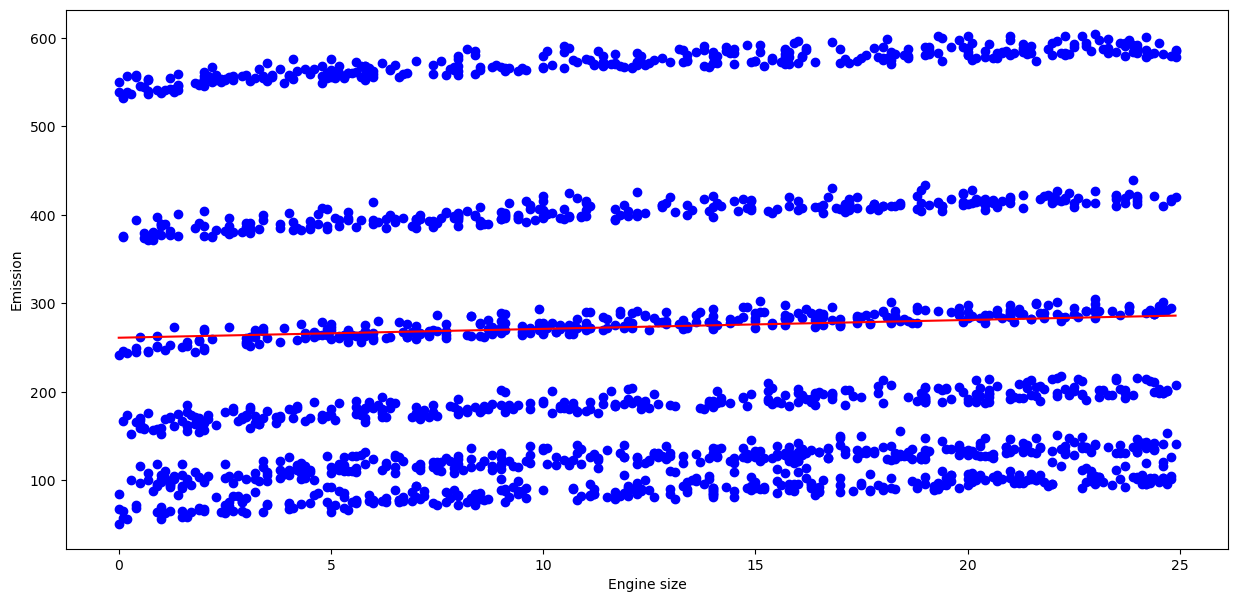

change: [6.9348971e-11]
282.5427036211922
[0.65395796]


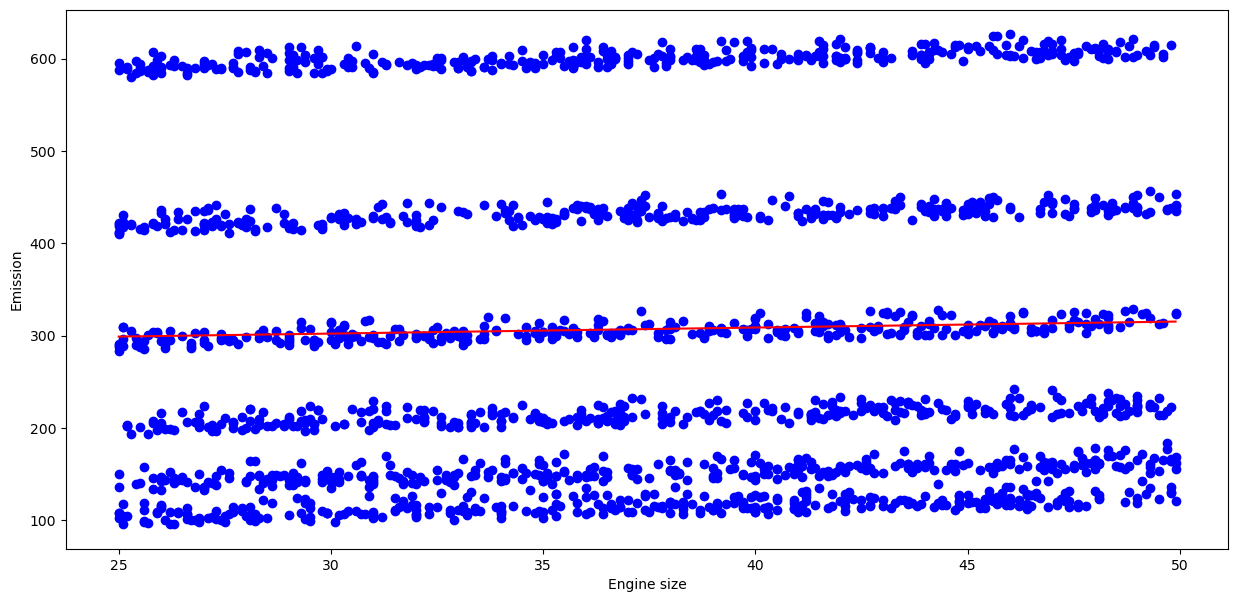

change: [-3.17754711e-11]
285.496475850683
[0.62218618]


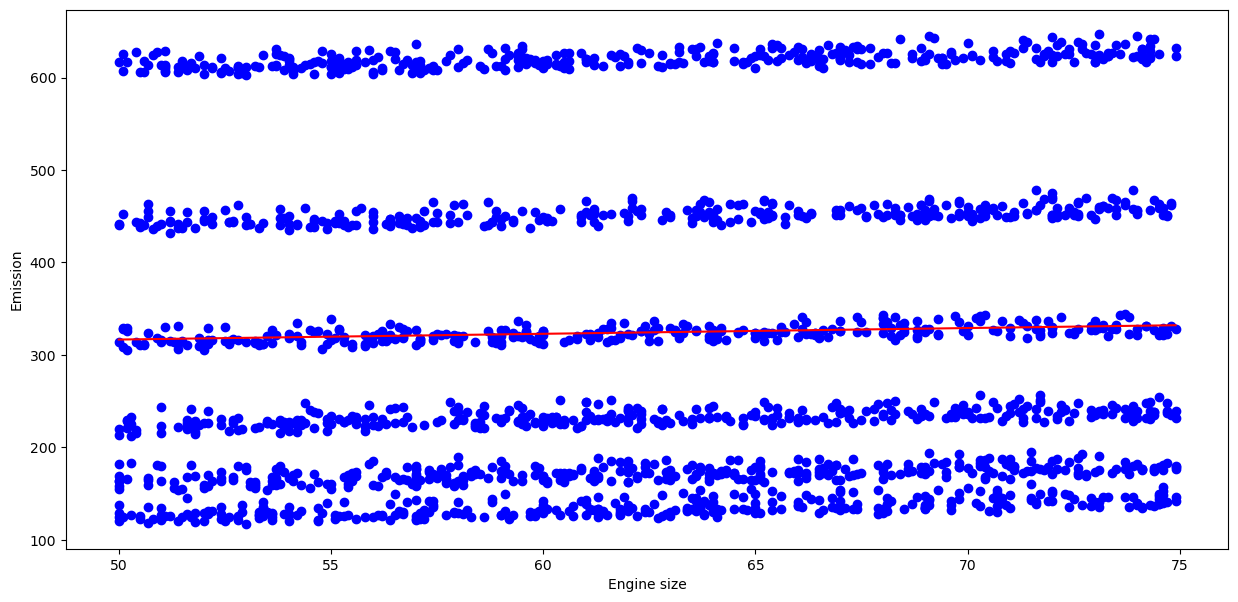

change: [-1.10276233e-11]
269.34533245438763
[0.80921465]


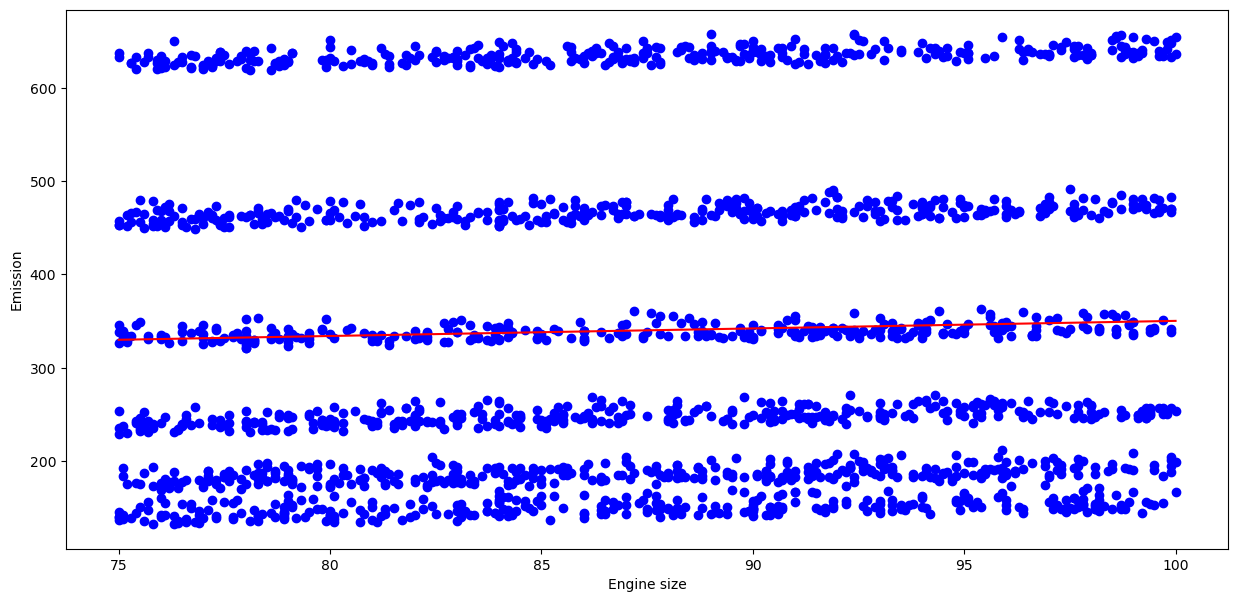

change: [8.52651283e-12]
[ 6.93489710e-11 -3.17754711e-11 -1.10276233e-11  8.52651283e-12]
[25.0, 50.0, 75.0, 100.000001]
25.00000000006935
New mask:
[0.0, 25.00000000006935, 50.0, 75.0, 100.000001]
///////////////////////////
260.55256249007886
[1.07134114]


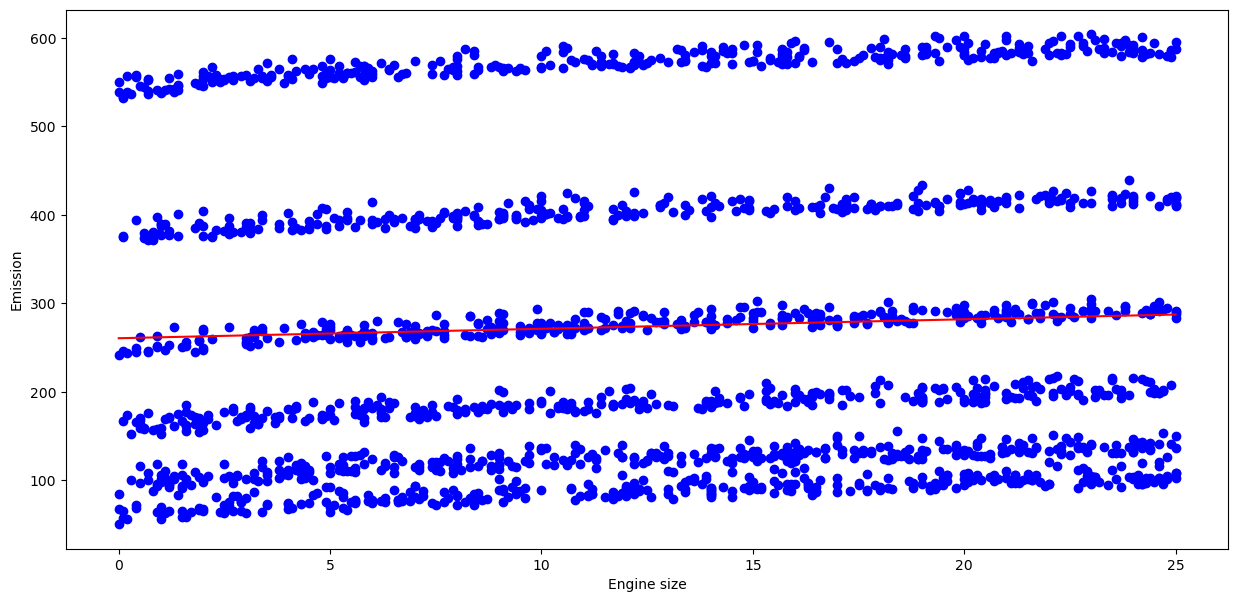

change: [5.65023583e-11]
280.7275756444676
[0.69757334]


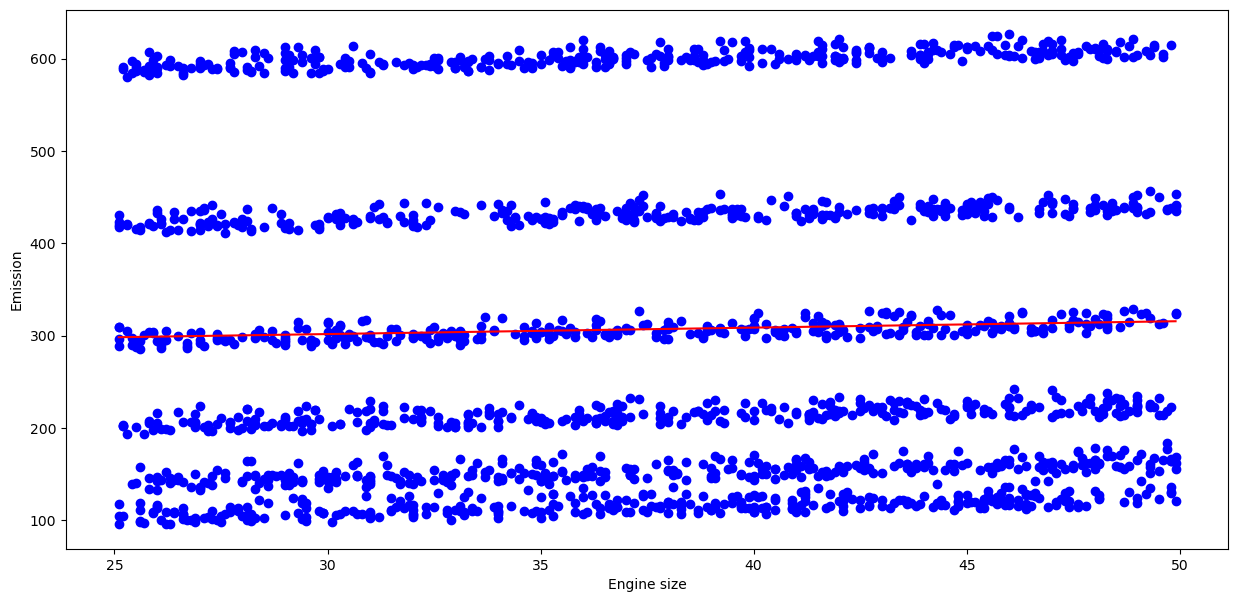

change: [1.23179689e-10]
285.496475850683
[0.62218618]


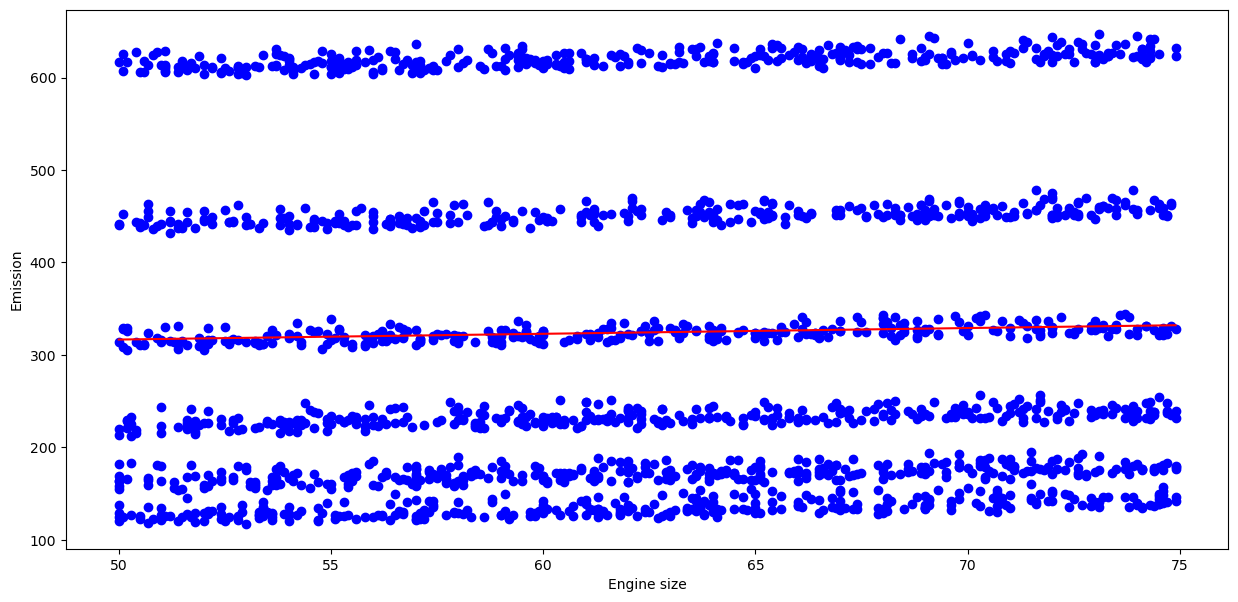

change: [-1.10276233e-11]
269.34533245438763
[0.80921465]


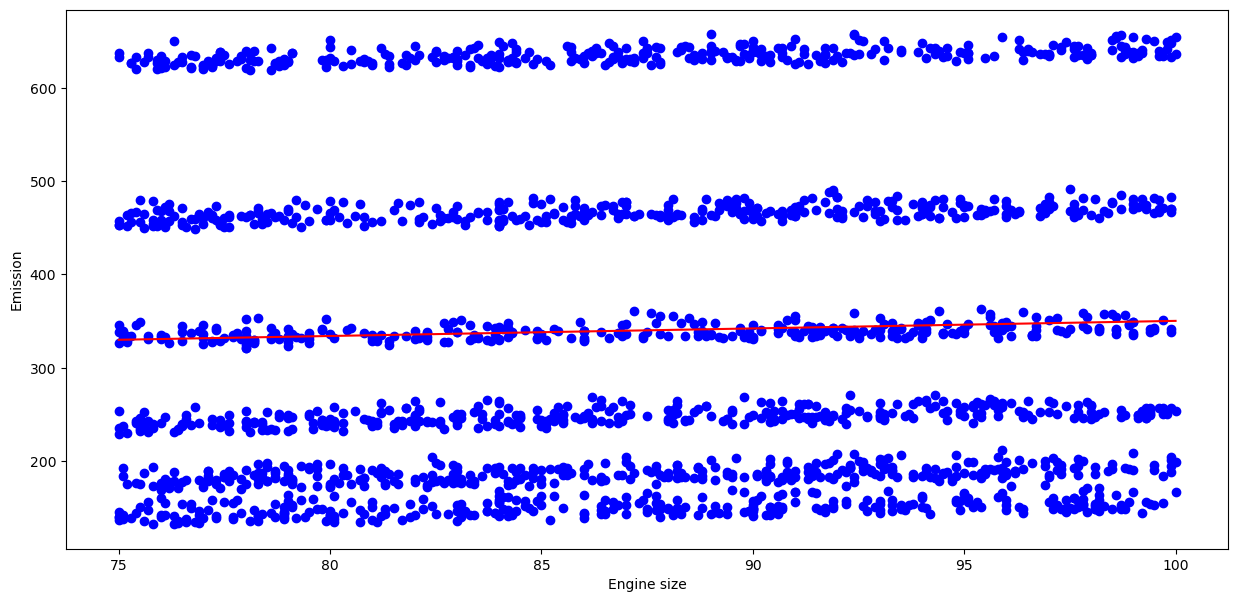

change: [8.52651283e-12]
[ 5.65023583e-11  1.23179689e-10 -1.10276233e-11  8.52651283e-12]
[25.00000000006935, 50.0, 75.0, 100.000001]
25.00000000012585
New mask:
[0.0, 25.00000000012585, 50.0, 75.0, 100.000001]
///////////////////////////
260.55256249007886
[1.07134114]


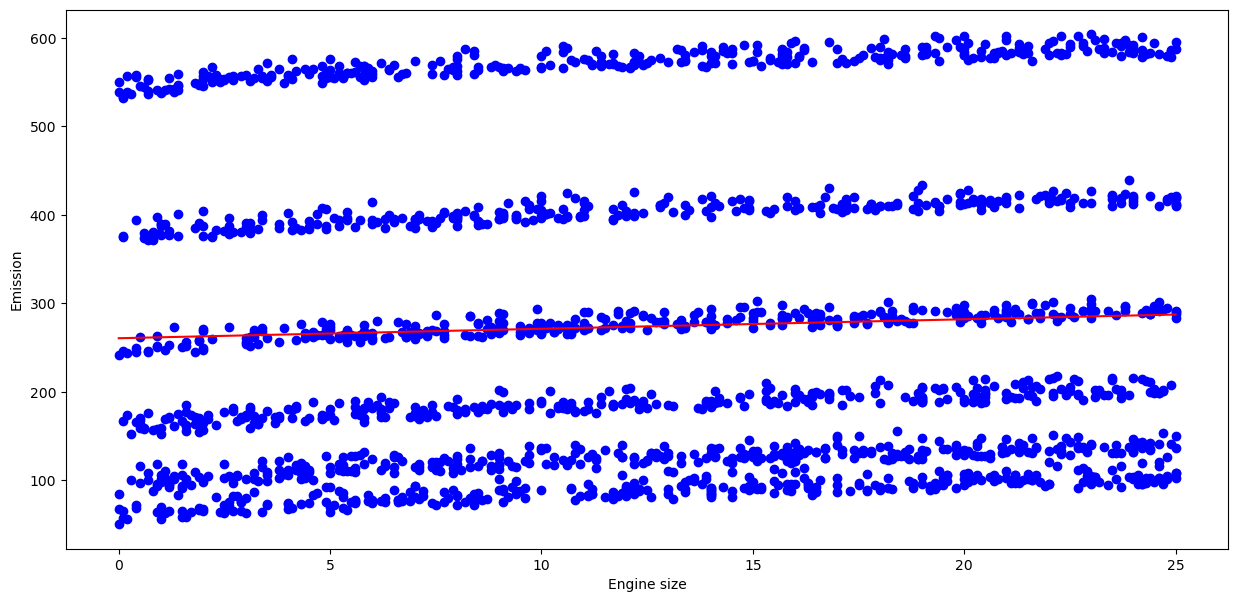

change: [5.65023583e-11]
280.7275756444676
[0.69757334]


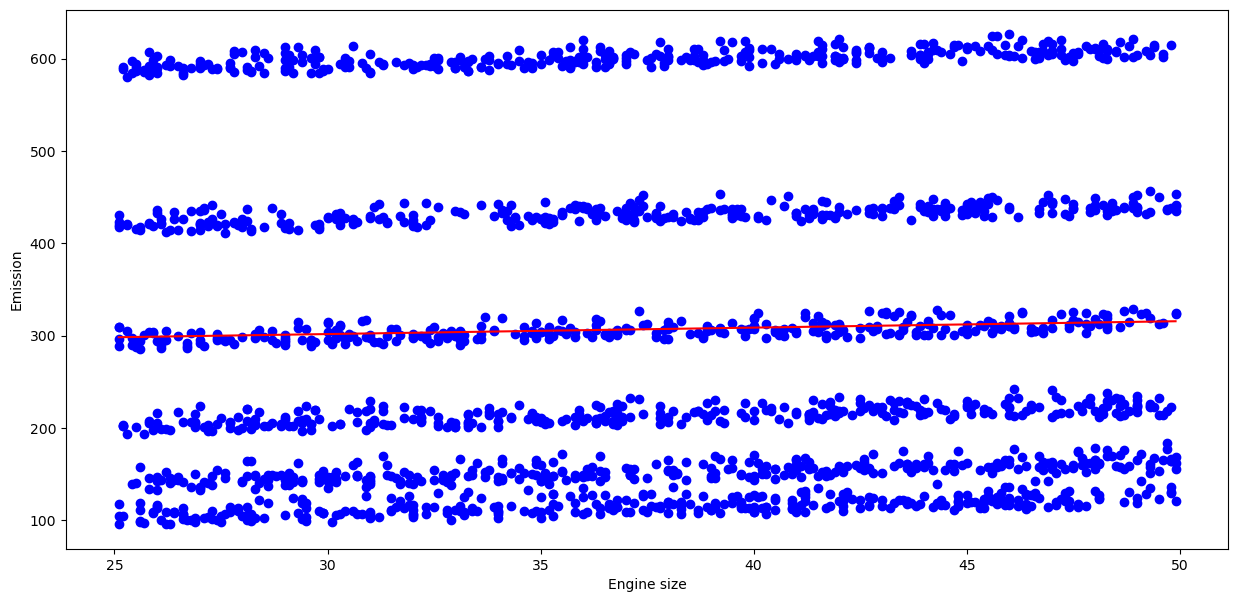

change: [1.23179689e-10]
285.496475850683
[0.62218618]


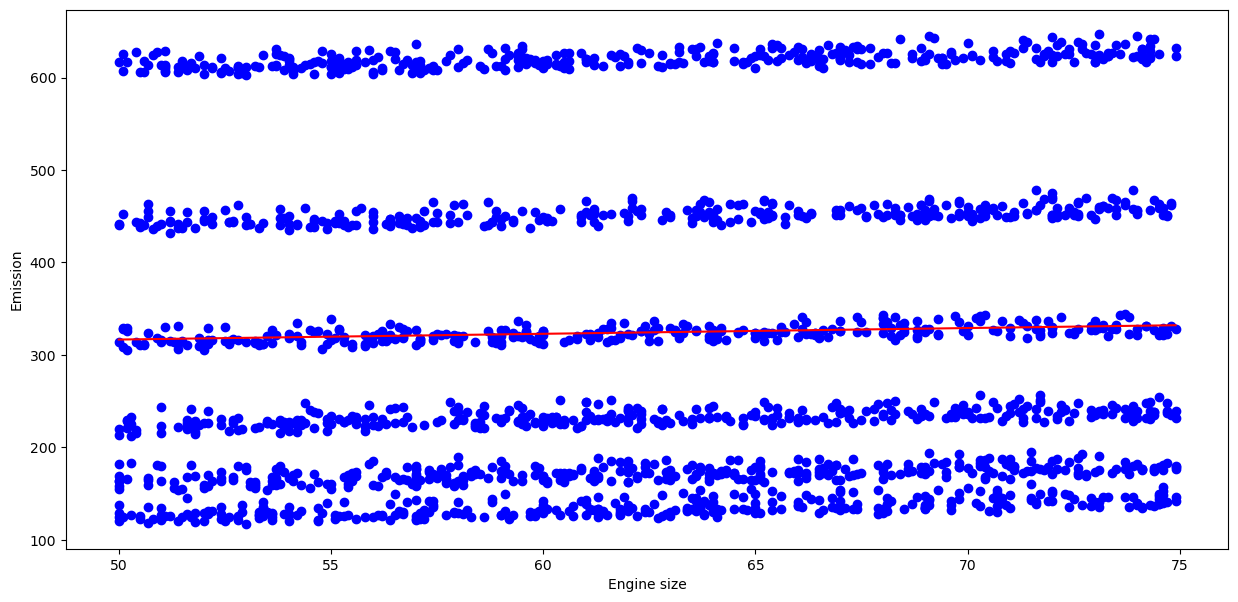

change: [-1.10276233e-11]
269.34533245438763
[0.80921465]


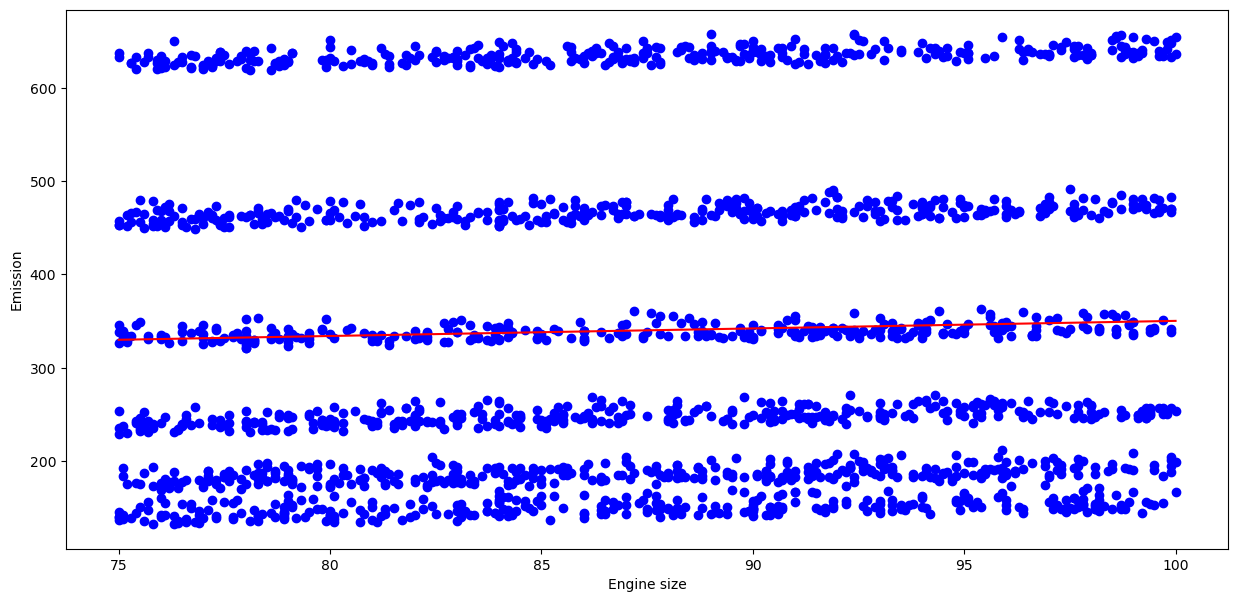

change: [8.52651283e-12]
[ 5.65023583e-11  1.23179689e-10 -1.10276233e-11  8.52651283e-12]
[25.00000000012585, 50.0, 75.0, 100.000001]
25.000000000182354
New mask:
[0.0, 25.000000000182354, 50.0, 75.0, 100.000001]
///////////////////////////
260.55256249007886
[1.07134114]


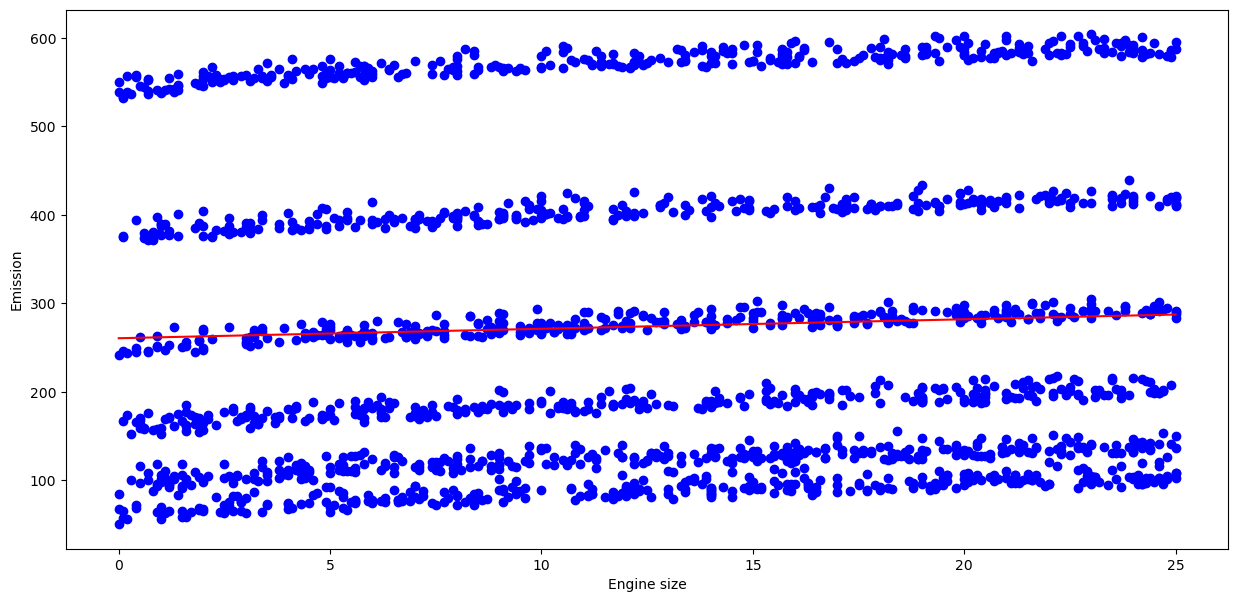

KeyboardInterrupt: 

In [ ]:
'''data = all_data[3]
#print(data[0])
print(data[0][0])
tree = WalkingTree(data[0],data[2],20,4,0.5)
WalkingTree.fit(tree,data[0],data[2],root=1)'''
#forest.append(WalkingTree)


In [ ]:
forest = []
times = []
#limits = [0.5,0.75,1,1.25,1.5,1.75,2]
divide = [1]
limits = [0.5,0.2,0.5,1]

#for each dataset we build a tree and mesure the elapsed time
for i,l in zip(all_data,limits):
    print(l)
    if(i==all_data[2]):
        continue
    f = []
    t = []
    for j in divide:
        
        print("-------------------------------------------------------")
    
        start = time.time()
        # create a regressor object
        tree = WalkingTree(i[0],i[2],20,2,l)
        WalkingTree.fit(tree,i[0],i[2])
    
        end = time.time()
        f.append(tree)
        t.append(end-start)
        
        
    forest.append(f)
    times.append(t)

0.5
-------------------------------------------------------
xxxxxxxxxleafxxxxxxxxxxxxxxx
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
xxxxxxxxxleafxxxxxxxxxxxxxxx
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2]
xxxxxxxxxleafxxxxxxxxxxxxxxx
[2 2 2 2 2 

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [ ]:
predicted_value = []#predicted points
difference = []
MSE = []
sum_y = []

all_mse = []

#for each tree we calculate the mean squared error
#all_data = [X_train,X_test,y_train,y_test,header]
for v in range(len(forest)):
    MSE = []
    for i in forest[v]:
        j = all_data[v]
        
        X_test = j[1]
        y_test = j[3]
        pv = []
        error = 0
        mse = 0
        for k in range(len(X_test)): 

            #p = predict(i,X_test[k])
            #print(np.reshape(X_test[k],(1, -1)))
            p = i.predict(np.reshape(X_test[k],(1, -1)),i,root=1)
            print(p,y_test[k])
    
            error += abs(y_test[k]-p[0])
            mse += (y_test[k]-p[0])**2
            pv.append(p)



        sum_y.append(sum(y_test))
        predicted_value.append(pv)
        difference.append(error)
        MSE.append(mse/len(X_test))

    all_mse.append(MSE)
    
    
print(all_mse)
print(time)

TypeError: WalkingTree.predict() got an unexpected keyword argument 'root'

In [ ]:
#create class for tree
class Forest:

    def __init__(self,x,y,all_data2,step=0,step_num=0,ratio=1):

        self.x = 0 #features
        self.y = 0 #labels

        self.all_data2 = all_data2

        self.Nc = 1
        self.Kp = 1

        self.step = step
        self.step_num = step_num
        self.ratio = ratio

        self.tree = 0
        self.forest = {}

    def load_data():
        #read in data
        pass
    def model(self,model_num):
        if(model_num == 1):
            self.tree = DecisionTreeRegressor(random_state = 0) 
        if(model_num == 2):
            self.tree = WalkingTree(self.x,self.y,self.step,self.step_num,self.ratio)
        if(model_num == 3):
            self.tree = CHNTree(len(all_data2[0][0][0][0]),self.Nc,self.Kp)
            
            
    def fit(self,model_num):
        if(model_num == 1):
            self.tree.fit(self.x, self.y)
        if(model_num == 2):
            self.tree.fit(self.x, self.y)
        if(model_num == 3):
            self.tree.clustering_H()

    def predict(self,x,y):
        self.predict([x,y])